# Exercício: Seleção de Modelos

Este exercício prático explora técnicas de seleção e validação de modelos.


In [1]:
# Imports necessários
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Configuração de plotting
plt.style.use("seaborn-v0_8")
plt.rcParams["figure.figsize"] = (10, 6)

## Objetivos do Exercício

- Aplicar cross-validation para seleção de modelos
- Comparar diferentes algoritmos de forma robusta
- Analisar métricas de avaliação
- Escolher o melhor modelo


## Tarefa 1: Preparação dos Dados

Carregue e prepare o dataset breast cancer.


In [3]:
dados = load_breast_cancer()

X = dados.data
y = dados.target

print(f"Formato dos dados: X={X.shape}, y={y.shape}")

df = pd.DataFrame(X, columns=dados.feature_names)
df['target'] = y

print("\nAmostra dos dados:")
display(df.head())

print("\nInformações gerais:")
df.info() 

print("\nBalanceamento das classes:")

print(df['target'].value_counts(normalize=True)) 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Tamanho do conjunto de treino: {X_train_scaled.shape[0]} amostras")
print(f"Tamanho do conjunto de teste: {X_test_scaled.shape[0]} amostras")

Formato dos dados: X=(569, 30), y=(569,)

Amostra dos dados:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0



Informações gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoot

## Tarefa 2: Cross-Validation

Aplique cross-validation para comparar modelos.


Modelo: KNN | Acurácia Média (CV): 0.9673 (+/- 0.0278)
Modelo: SVC | Acurácia Média (CV): 0.9672 (+/- 0.0254)
Modelo: Random Forest | Acurácia Média (CV): 0.9622 (+/- 0.0262)


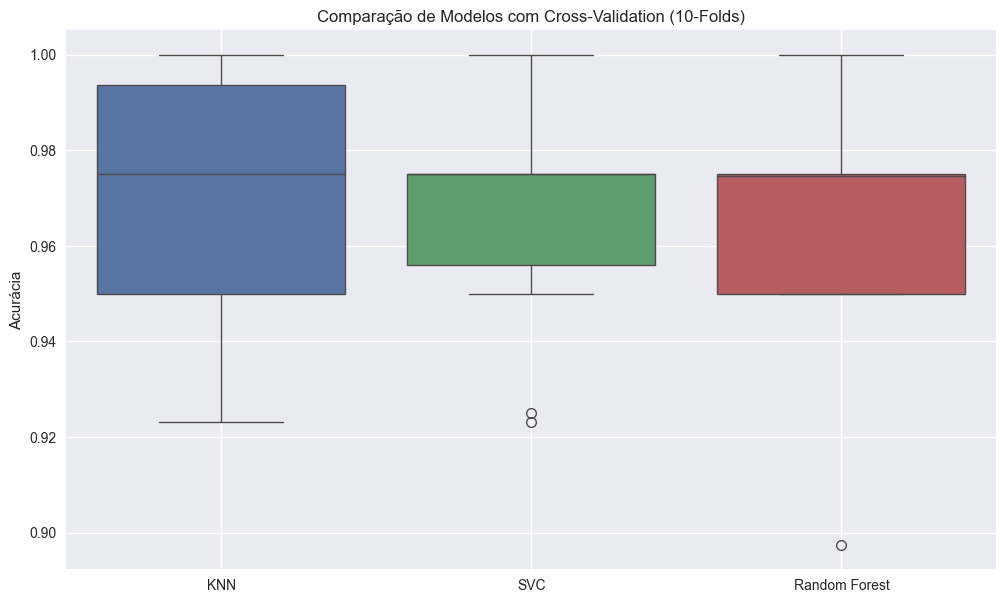


Iniciando GridSearchCV para o RandomForest...
Fitting 10 folds for each of 36 candidates, totalling 360 fits

Melhores parâmetros encontrados:
{'max_depth': None, 'min_samples_leaf': 2, 'n_estimators': 200}

Melhor acurácia (CV) durante a busca:
0.9672


In [5]:
models = {
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

cv_strategy = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

cv_results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=cv_strategy, scoring='accuracy')
    cv_results[name] = scores
    print(f"Modelo: {name} | Acurácia Média (CV): {scores.mean():.4f} (+/- {scores.std():.4f})")

plt.figure(figsize=(12, 7))
sns.boxplot(data=pd.DataFrame(cv_results))
plt.title('Comparação de Modelos com Cross-Validation (10-Folds)')
plt.ylabel('Acurácia')
plt.grid(True)
plt.show()


from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [50, 100, 200],      
    'max_depth': [None, 10, 20, 30],     
    'min_samples_leaf': [1, 2, 4]        
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    cv=cv_strategy, 
    scoring='accuracy',
    verbose=1, 
    n_jobs=-1  
)

print("\nIniciando GridSearchCV para o RandomForest...")
grid_search.fit(X_train_scaled, y_train)

print("\nMelhores parâmetros encontrados:")
print(grid_search.best_params_)
print("\nMelhor acurácia (CV) durante a busca:")
print(f"{grid_search.best_score_:.4f}")

best_model = grid_search.best_estimator_

## Tarefa 3: Avaliação Final

Avalie o melhor modelo no conjunto de teste.


--- Avaliação Final do Melhor Modelo no Conjunto de Teste ---

Relatório de Classificação Final:
              precision    recall  f1-score   support

   malignant       0.94      0.91      0.92        64
      benign       0.94      0.96      0.95       107

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171


Matriz de Confusão:


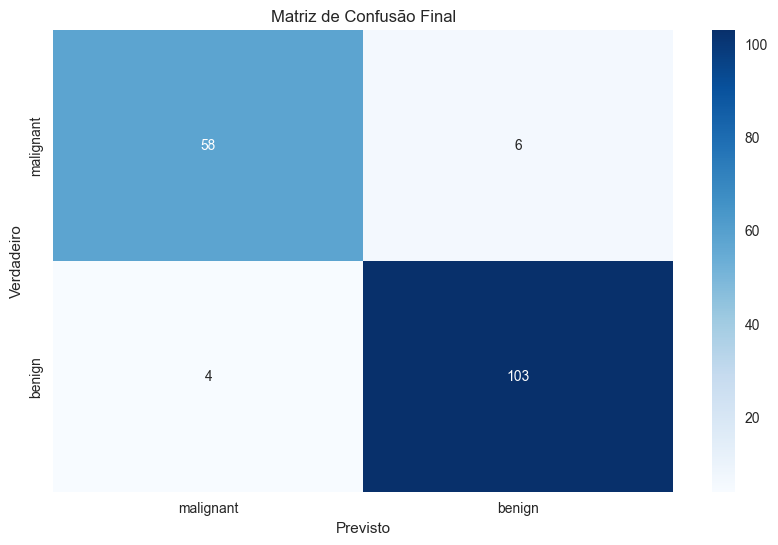

In [6]:
print("--- Avaliação Final do Melhor Modelo no Conjunto de Teste ---")

y_pred_final = best_model.predict(X_test_scaled)

print("\nRelatório de Classificação Final:")
print(classification_report(y_test, y_pred_final, target_names=dados.target_names))

print("\nMatriz de Confusão:")
cm = confusion_matrix(y_test, y_pred_final)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=dados.target_names, yticklabels=dados.target_names)
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão Final')
plt.show()